# Step-to -step time evolution:
## Floquet operator:


\begin{equation}
\hat{F} = \int e^{-i\hat{H(t)}}dt
\end{equation}


\begin{equation}
\hat{F} = \exp\left({\frac{-i\tau_z \hat{J_z}^2}{2j+1}-i\alpha_z \hat{J}_z}\right) \times \exp\left({-i\alpha_y \hat{J}_y}\right)
\end{equation}

\begin{equation}
J_{y} = \dfrac{1}{2i}(J_{+} - J_{-})
\end{equation}

\begin{equation}
J_{+}|j,m\big> = \sqrt{j(j+1)-m(m+1)}|j,m+1\big> \\
J_{-}|j,m\big> = \sqrt{j(j+1)-m(m-1)}|j,m-1\big>
\end{equation}

Eigenvalues of Floquet operator: 
\begin{equation}
D_{j} = e^{i\phi_{j}}
\end{equation}

In [8]:
#Programa que descreve uma particula quantica interagente. Floquet OPERATOR
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm
from numpy import linalg as la
import random
import pylab

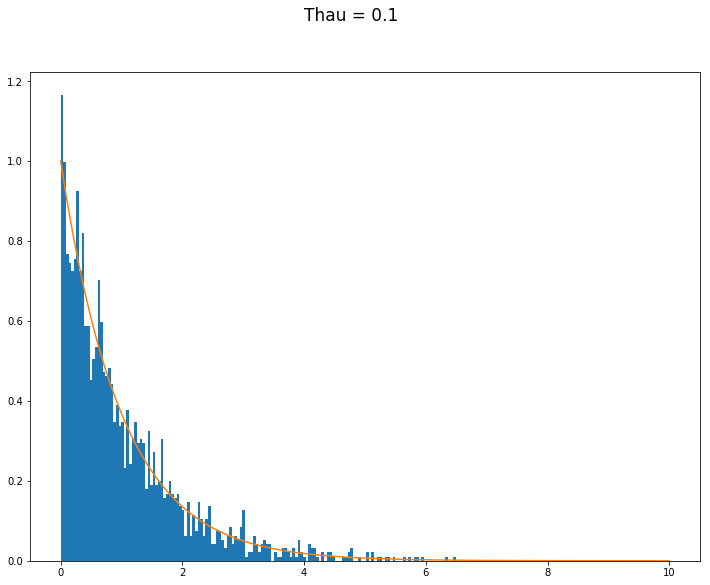

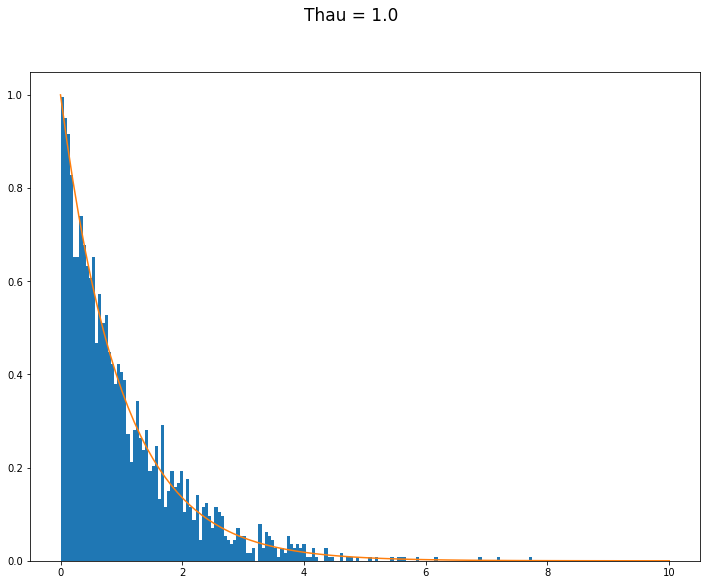

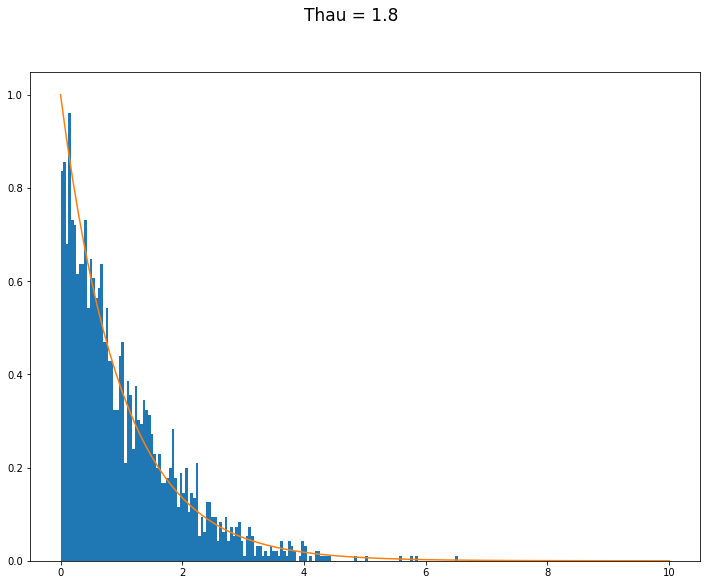

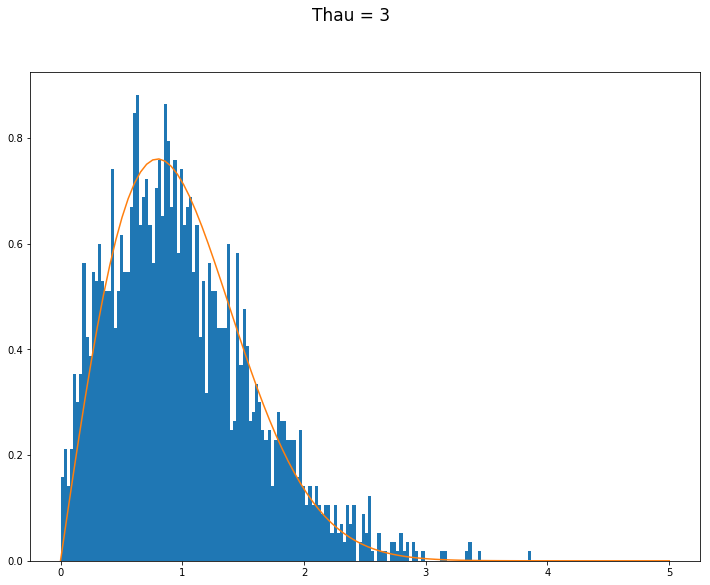

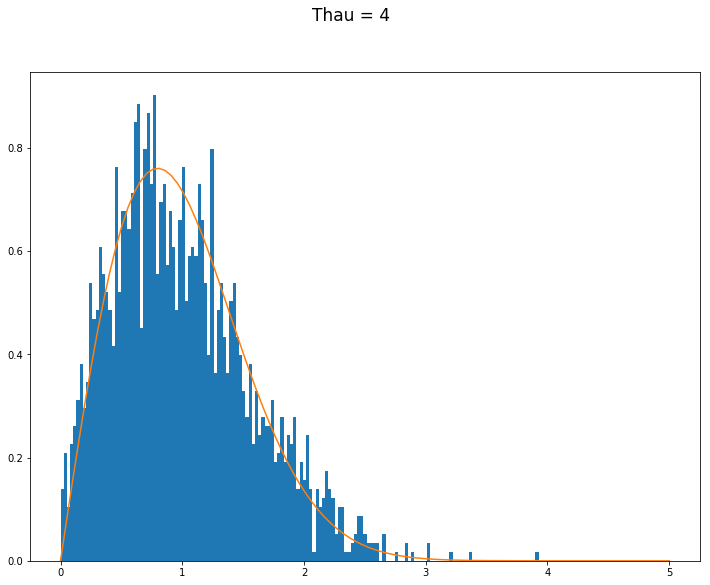

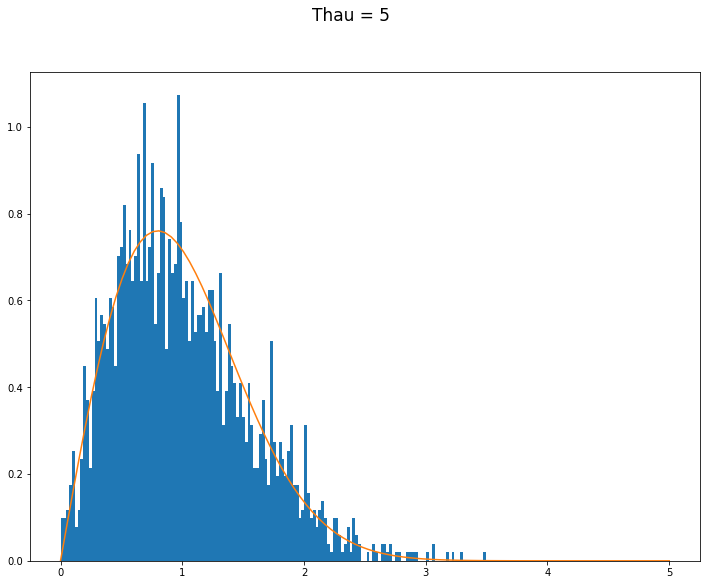

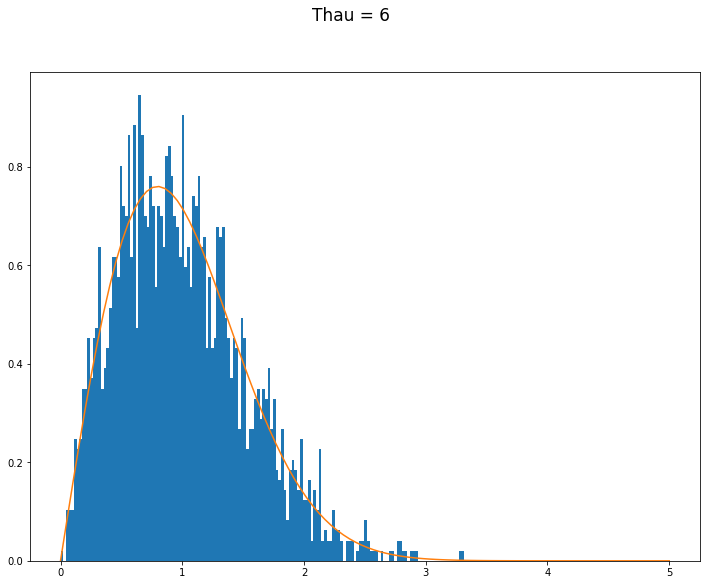

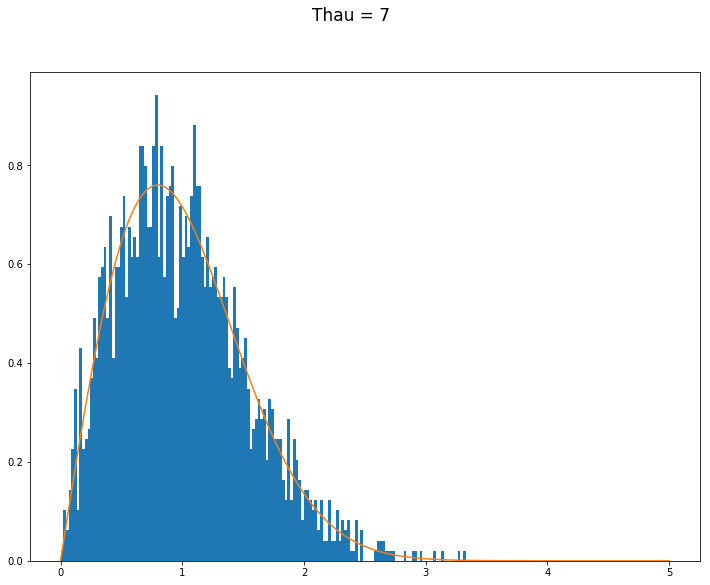

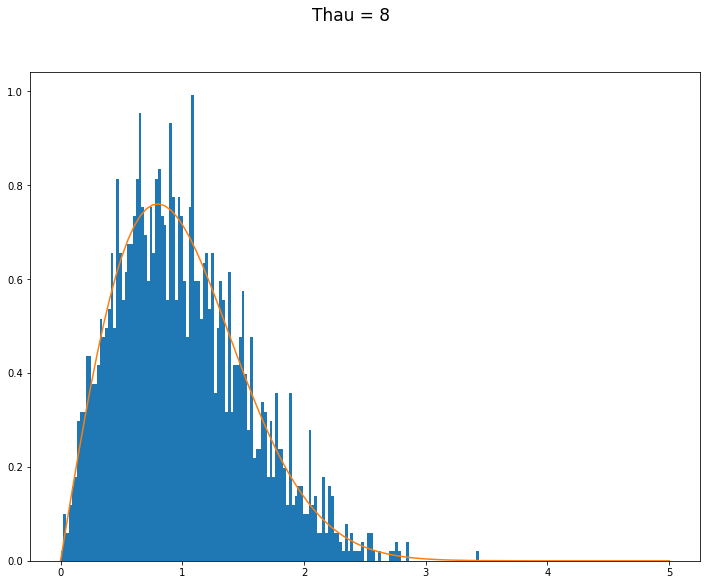

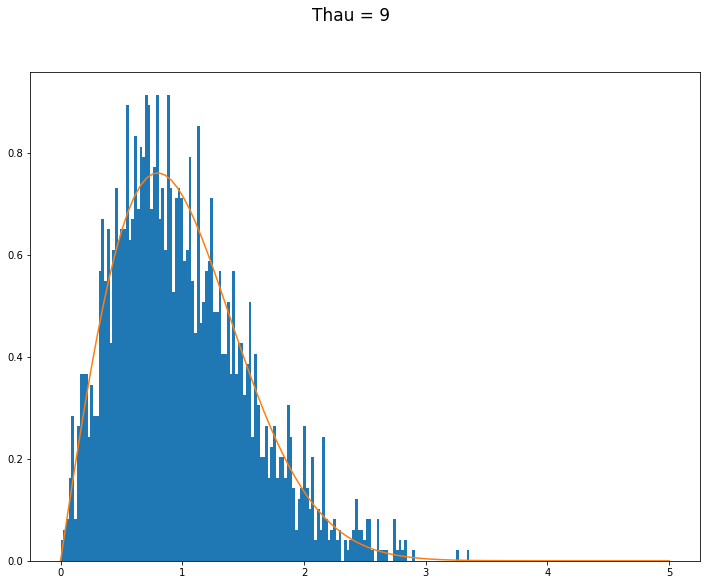

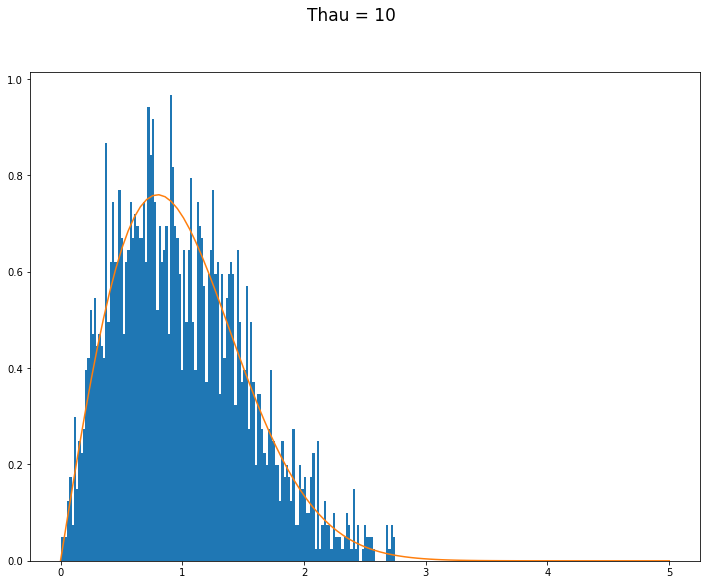

--- 866.675751925 seconds ---


In [10]:
#contando o tempo
start_time = time.time()

#Definir os parametros
alphay = 1
alphaz = 1
j = 1100
tau = np.array([0.1,1.,1.8,3.,4.,5.,6.,7.,8.,9.,10.])
    
#Iniciar os operadores com zero
Jz = np.zeros((2*j + 1 , 2*j + 1))
Jy = np.zeros((2*j + 1 , 2*j + 1))
Jz2 = np.zeros((2*j + 1 , 2*j + 1))
dif = np.zeros(2*j + 1)
phi = np.zeros(2*j + 1, dtype = complex)
    
for s in range(0,11):       
    #Definir Jz
    m=-j
    for i in range(0,2*j+1,1):
        Jz[i,i] = m
        m = m + 1
        
    #Definir Jy 
    m = -j
    for i in range(0,2*j):
        if(i<2*j):
            Jy[i,i+1] = -math.sqrt((j*(j + 1) - m*(m + 1)))
            Jy[i,i-1] = math.sqrt((j*(j + 1) - m*(m - 1))) 
            Jy[i+1,i] = math.sqrt((j*(j + 1) - m*(m + 1)))
            Jy[i-1,i] = -math.sqrt((j*(j + 1) - m*(m - 1))) 
            m = m + 1
    #Definir Jz^2
    Jz2 = np.dot(Jz,Jz)
    
    #Definindo o operador F e atualizando as matrizes 
    term1 = (-1)*complex(0,1)*((tau[s]*Jz2)/(2*j + 1))
    term2 = (-1)*complex(0,1)*(alphaz*Jz)
    term3 = (-1)*(alphay*Jy)/2
    
    F = np.dot(expm(term1+term2),expm(term3))
    #print(F)
    #Diagonalizando o operador F
    D = la.eigvals(F)             
    
    for i in range(0, 2*j + 1):
        phi[i] = np.angle(D[i])
    
    #Pegando o módulo de Phi real
    phiR = np.sort(np.real(phi))

    #Calculando a diferença 
    for i in range(0, 2*j):
        dif[i] = phiR[i+1] - phiR[i]
    
    #Definindo PhiBarra
    phirbar=(2*np.pi)/(2*j+1)
    
    #Definindo a diferença sobre phiBarra
    S = dif/phirbar
    
    #Definindo as funções exponencial decrescente e a Gaussiana
    def P1(S):
        return np.exp(-S)

    def P2(S):
        return np.exp(- np.pi*S**2/4) * np.pi*S/2

    
    if(tau[s]>=3):
        plt.rcParams['figure.figsize'] = (12,9)
        plt.suptitle('Thau = %s ' % (s), fontsize=17)
        plt.hist(S, bins=150, density=1)
        x = np.linspace(0,5,100) 
        y = P2(x) 
        pylab.plot(x,y) 
        pylab.show() 
        plt.show()
    else:
        plt.rcParams['figure.figsize'] = (12,9)
        plt.suptitle('Thau = %s ' % (tau[s]), fontsize=17)
        plt.hist(S, bins=150, density=1)
        x = np.linspace(0,10,100) 
        y = P1(x) 
        pylab.plot(x,y) 
        pylab.show() 
        plt.show()
    
print("--- %s seconds ---" % (time.time() - start_time))